# Importing Required libraries

In [ ]:
import numpy as num
import pandas as pan
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
!pip install --upgrade scikit-learn


**Loading the csv file**

In [ ]:
# mounting heart attack dataset
hrt_attackDtst = pan.read_csv('/heart_attack_prediction_dataset.csv')   # read_csv() is a function used to load data
hrt_attackDtst

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  \
0            0               0        1        0  ...   
1            1               1        1        1  ...   
2            1               0        0        0  ...   
3            1               1        1        0  ...   
4            1               1        1        1  ...   
...        ...             ...      ...      ...  ...   
8758         1               1        1        0  ...   
8759         1               0        0        1  ...   
8760         0               1        1        1  ...   
8761         1               0        1        0  ...   
8762         1               1        0        0  ...   

      Sedentary Hours Per Day  Income        BMI  Triglycerides  \
0                    6.615001  261404  31.251233            286   
1                    4.963459  285768  27.194973            235   
2                    9.463426  235282  28.176571            587   
3                    7.648981  125640  36.464704            378   
4                    1.514821  160555  21.809144            231   
...                       ...     ...        ...            ...   
8758                10.806373  235420  19.655895             67   
8759                 3.833038  217881  23.993866            617   
8760                 2.375214   36998  35.406146            527   
8761                 0.029104  209943  27.294020            114   
8762                 9.005234  247338  32.914151            180   

      Physical Activity Days Per Week  Sleep Hours Per Day         Country  \
0                                   0                    6       Argentina   
1                                   1                    7          Canada   
2                                   4                    4          France   
3                                   3                    4          Canada   
4                                   1                    5        Thailand   
...                               ...                  ...             ...   
8758                                7                    7        Thailand   
8759                                4                    9          Canada   
8760                                4                    4          Brazil   
8761                                2                    8          Brazil   
8762                                7                    4  United Kingdom   

          Continent           Hemisphere  Heart Attack Risk  
0     South America  Southern Hemisphere                  0  
1     North America  Northern Hemisphere                  0  
2            Europe  Northern Hemisphere                  0  
3     North America  Northern Hemisphere                  0  
4              Asia  Northern Hemisphere                  0  
...             ...                  ...                ...  
8758           Asia  Northern Hemisphere                  0  
8759  North America  Northern Hemisphere                  0  
8760  South America  Southern Hemisphere                  1  
8761  South America  Southern Hemisphere                  0  
8762         Europe  Northern H

**Viewing the dimensions and columns of the dataset**

In [ ]:
print("The Dataset Dimensions are: ", hrt_attackDtst.shape)  # shape function is used to find dimensions of dataset
print("The Columns in Dataset are: ", hrt_attackDtst.columns)   # displaying all columns

The Dataset Dimensions are:  (8763, 26)
The Columns in Dataset are:  Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


**Adressing the Missing or NaN values (if any)**

In [ ]:
NaNvals = hrt_attackDtst.isnull().sum()  # sum() function is used to sum up the null values in total
print("Missing Values: \n", NaNvals)        # isnull() method is used to find All the null values

Missing Values: 
 Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


**splitting the Blood pressure column into Systolic and Daistolic**

In [ ]:
hrt_attackDtst['BP_Systolic'] = hrt_attackDtst['Blood Pressure'].apply(lambda x: int(x.split('/')[0])) # splitting bp column into systolic and diastolic
hrt_attackDtst['BP_Diastolic'] = hrt_attackDtst['Blood Pressure'].apply(lambda x: int(x.split('/')[1])) # split method is used and bifercated by /

In [ ]:
hrt_attackDtst[['BP_Diastolic','BP_Systolic']]  # displaying the splitted feature.

BP_Diastolic  BP_Systolic
0               88          158
1               93          165
2               99          174
3              100          163
4               88           91
...            ...          ...
8758            76           94
8759           102          157
8760            75          161
8761            67          119
8762            67          138

[8763 rows x 2 columns]

In [ ]:
# drop function is used to drop blood pressure column
hrt_attackDtst.drop('Blood Pressure', axis=1, inplace=True)

**Differentiating columns between numerical and categorical features**

In [ ]:
# numerical features columns in the given dataset
numerical_ftrs = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'BP_Systolic', 'BP_Diastolic']
# categorical features columns in the data set
categorical_ftrs = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Country', 'Continent', 'Hemisphere']

***# Step 2: Exploratory Data Analysis (EDA)***

**1.Displaying Top 6 columns using head method**

In [ ]:
# head() function is used to display data frame where n value is given as 6 where as 5 is default
hrt_attackDtst.head(6)

Patient ID  Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0    BMW7812   67    Male          208          72         0               0   
1    CZE1114   21    Male          389          98         1               1   
2    BNI9906   21  Female          324          72         1               0   
3    JLN3497   84    Male          383          73         1               1   
4    GFO8847   66    Male          318          93         1               1   
5    ZOO7941   54  Female          297          48         1               1   

   Smoking  Obesity  Alcohol Consumption  ...        BMI Triglycerides  \
0        1        0                    0  ...  31.251233           286   
1        1        1                    1  ...  27.194973           235   
2        0        0                    0  ...  28.176571           587   
3        1        0                    1  ...  36.464704           378   
4        1        1                    0  ...  21.809144           231   
5        1        0                    1  ...  20.146840           795   

   Physical Activity Days Per Week  Sleep Hours Per Day    Country  \
0                                0                    6  Argentina   
1                                1                    7     Canada   
2                                4                    4     France   
3                                3                    4     Canada   
4                                1                    5   Thailand   
5                                5                   10    Germany   

       Continent           Hemisphere  Heart Attack Risk  BP_Systolic  \
0  South America  Southern Hemisphere                  0          158   
1  North America  Northern Hemisphere                  0          165   
2         Europe  Northern Hemisphere                  0          174   
3  North America  Northern Hemisphere                  0          163   
4           Asia  Northern Hemisphere                  0           91   
5         Europe  Northern Hemisphere                  1          172   

   BP_Diastolic  
0            88  
1            93  
2            99  
3           100  
4            88  
5            86  

[6 rows x 27 columns]

**Describing Measures of Central Tendency**

In [ ]:
# describe() function is used to describe all the values of central tendency of each and every column
hrt_attackDtst.describe()

Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313                 5.783745   
min       0.000000     0.000000             0.000000                 0.002442   
25%       1.000000     0.000000             0.000000                 4.981579   
50%       1.000000     1.000000             1.000000                10.069559   
75%       1.000000     1.000000             1.000000                15.050018   
max       1.000000     1.000000             1.000000                19.998709   

       Previous Heart Problems  ...  Stress Level  Sedentary Hours Per Day  \
count              8763.000000  ...   8763.000000              8763.000000   
mean                  0.495835  ...      5.469702                 5.993690   
std                   0.500011  ...      2.859622                 3.466359   
min                   0.000000  ...      1.000000                 0.001263   
25%                   0.000000  ...      3.000000                 2.998794   
50%                   0.000000  ...      5.000000                 5.933622   
75%                   1.000000  ...      8.000000                 9.019124   
max                   1.000000  ...     10.000000                11.999313   

              Income          BMI  Triglycerides  \
count    8763.000000  8763.000000    8763.000000   
mean   158263.181901    28.891446     417.677051   
std     80575.190806     6.319181     223.748137   
min     20062.000000    18.002337      30.000000   
25%     88310.000000    23.422985     225.500000   
50%    157866.000000    28.768999     417.000000   
75%    227749.000000    34.324594     612.000000   
max    299954.000000    39.997211     800.000000   

       Physical Activity Days Per Week  Sleep Hours Per Day  \
count                      8763.000000          8763.000000   
mean                          3.489672             7.023508   
std                           2.282687             1.988473   
min                           0.000000             4.000000   
25%                           2.000000             5.000000   
50%                           3.000000             7.000000   
75%                           5.000000             9.000000   
max                           7.000000            10.000000   

       Heart Attack Risk  BP_Systolic  BP_Diastolic  
count        8763.000000  8763.000000   8763.000000  
mean            0.358211   135.075659     85.156111  
std             0.479502    26.349976     14.676565  
min             0.000000    90.000000     60.000000  
25%             0.000000   112.000000     72.000000  
50%             0.000000   135.000000     85.000000  
75%             1.000000   158.000000     98.000000  
max             1.000000   180.000000    110.000000  

[8 rows x 21 columns]

**Describing information about dataset which include deatails such as Data Type and Non Null count**

In [ ]:
# info() method is used get information about the dataset
hrt_attackDtst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

**plotting graphs between various Categorical Features to understand them**



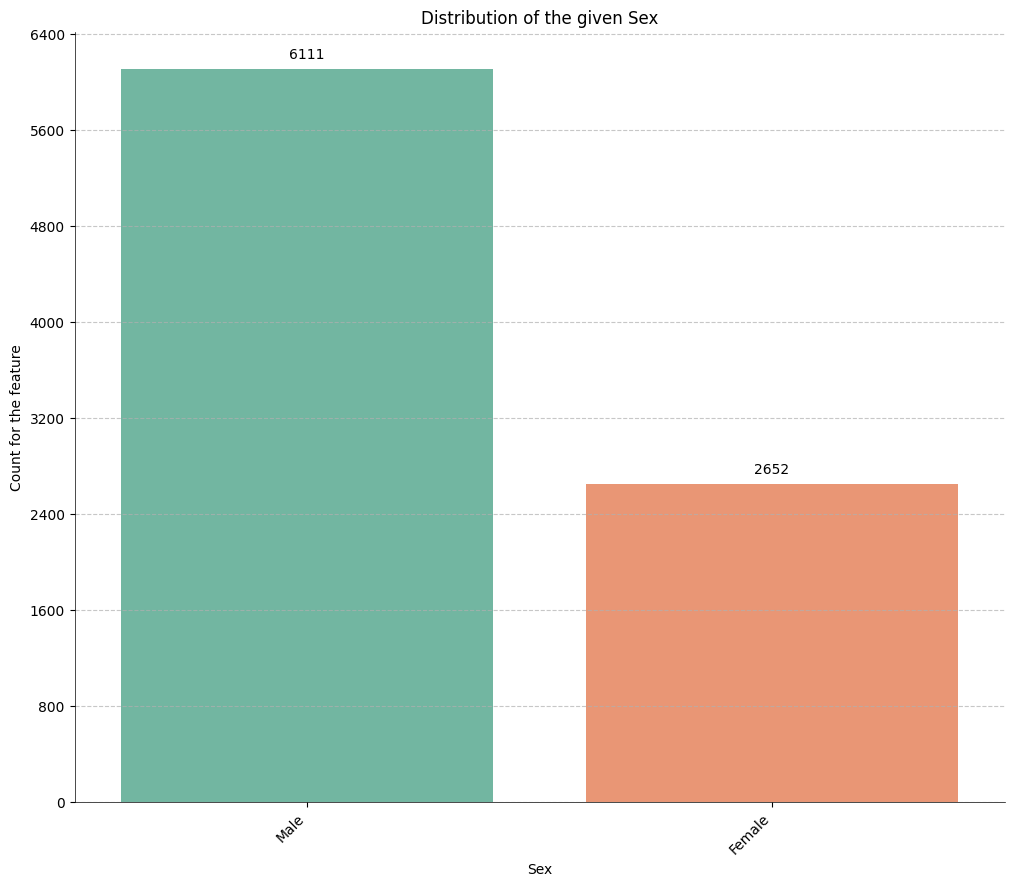

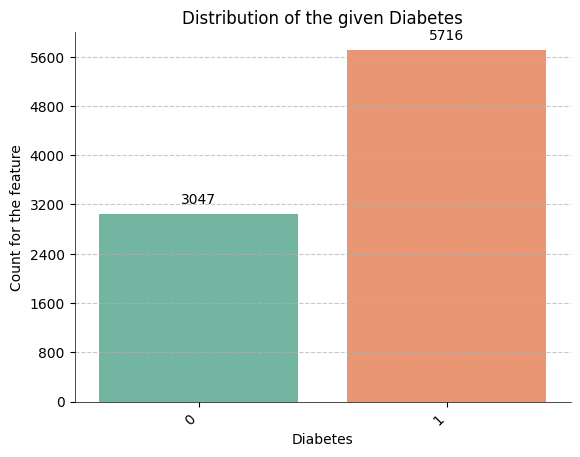

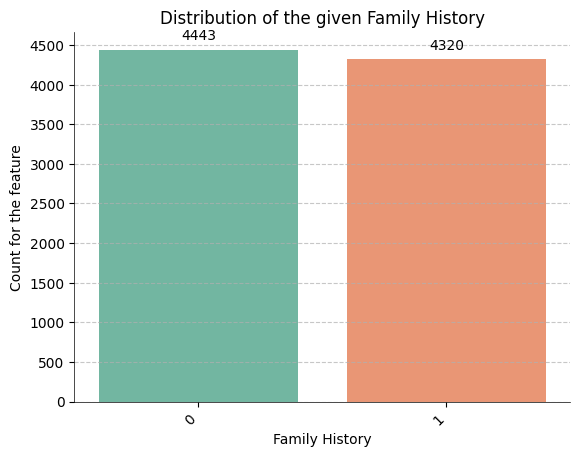

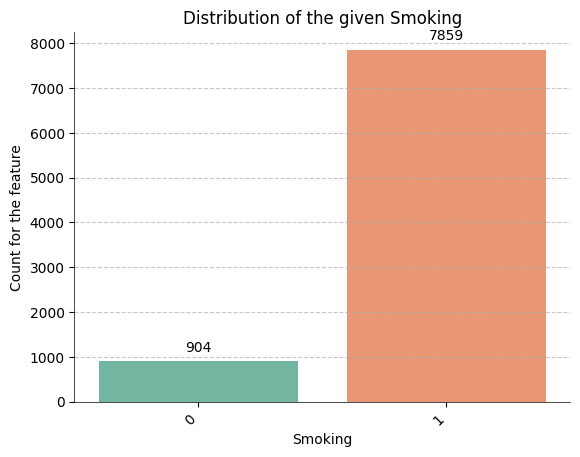

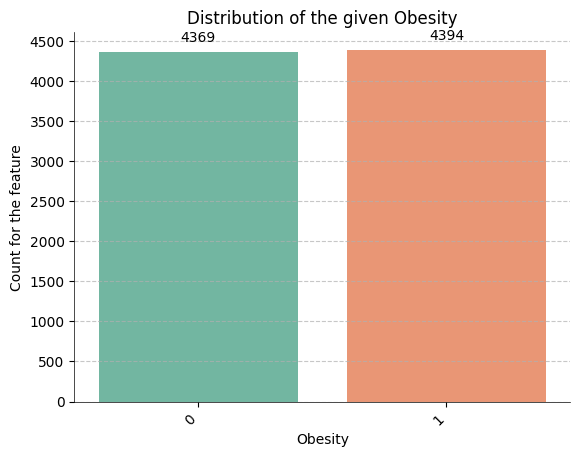

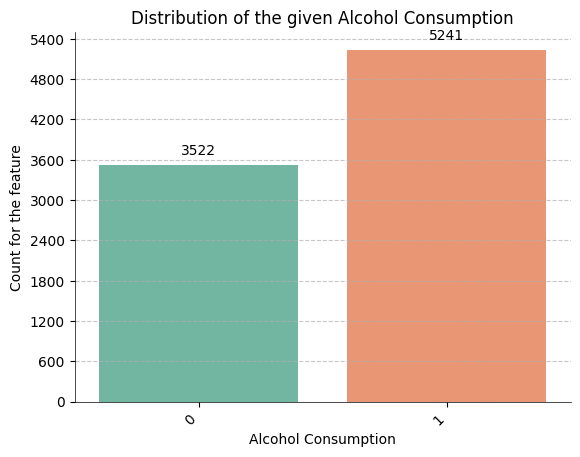

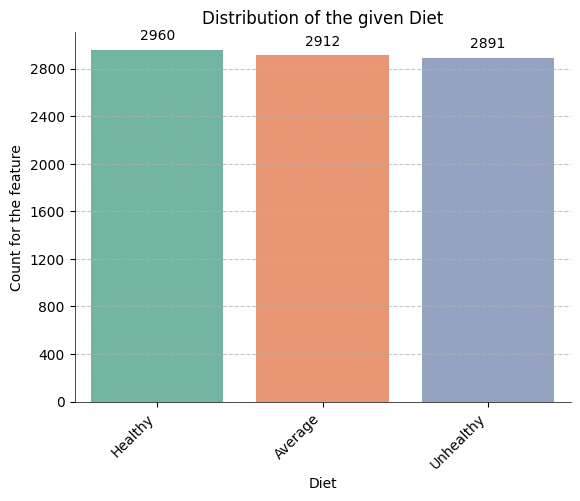

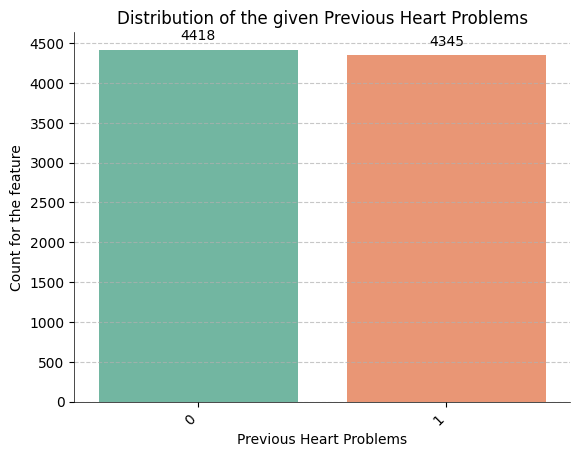

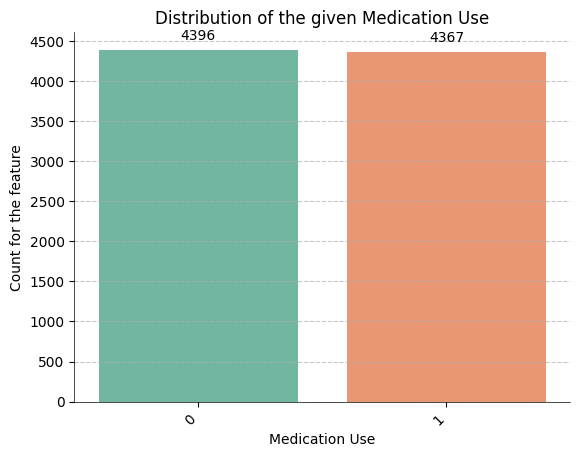

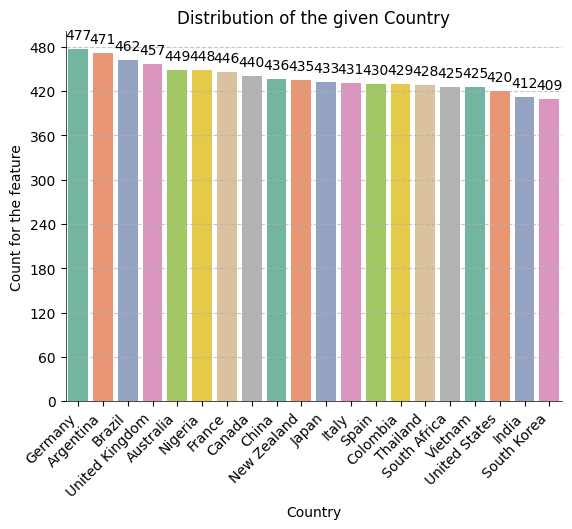

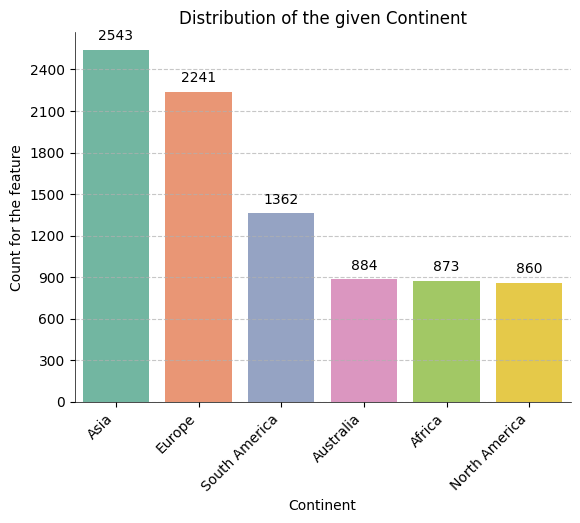

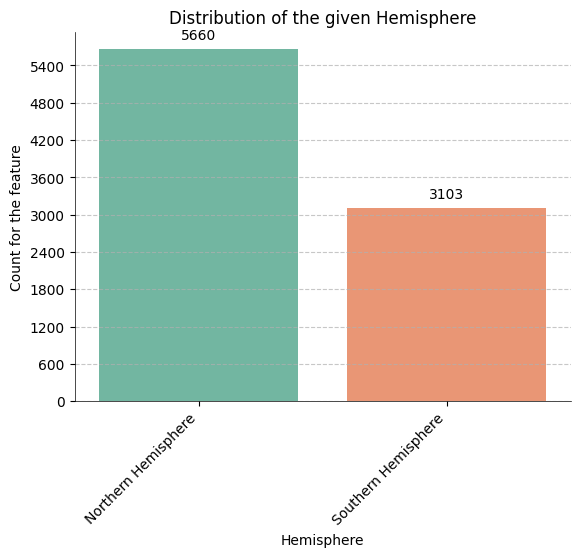

In [ ]:
# figure() is being defined with sizes:
plot.figure(figsize=(12, 10))
# Defining a color palette
colorPalette = sns.color_palette("Set2")

# plot of various Categorical Features:
for ftr in categorical_ftrs:
    cnt = hrt_attackDtst[ftr].value_counts()
    chrt = sns.barplot(x=cnt.index, y=cnt, palette=colorPalette)  # Set the color palette

    for patch in chrt.patches:
        chrt.annotate(format(patch.get_height(), '.0f'),
                       (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points',
                       fontsize=10)
     # setting title, Ylabel, Xlabel
    chrt.set_xticklabels(chrt.get_xticklabels(), rotation=45, horizontalalignment='right')
    plot.title(f'Distribution of the given {ftr}')
    plot.xlabel(ftr)
    plot.ylabel('Count for the feature')

    # Customizing the appearance
    ax = plot.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.yaxis.set_major_locator(plot.MaxNLocator(integer=True))

    # Add grid lines
    plot.grid(axis='y', linestyle='--', alpha=0.7)
    # Displaying
    plot.show()

**plot between Avg BMI and Country-wise**

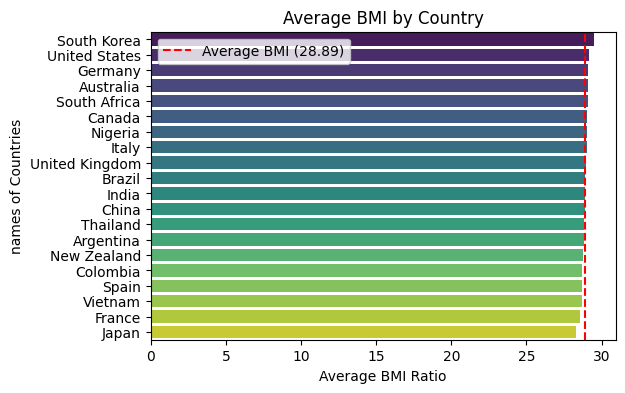

In [ ]:
# caliculating mean of BMI country-wise
country_bmiMean = hrt_attackDtst.groupby('Country')['BMI'].mean().sort_values(ascending=False)
# Defining Figure and its size
plot.figure(figsize=(6, 4))
colorPalette = sns.color_palette("viridis", len(country_bmiMean))  # defining color palatte
# plotting
sns.barplot(x=country_bmiMean.values, y=country_bmiMean.index, palette=colorPalette)
# defining Xlabel,Ylabel,Title.
plot.xlabel('Average BMI Ratio')
plot.ylabel('names of Countries')
plot.title('Average BMI by Country')
# caliculating avg BMI
avrgBmi = hrt_attackDtst['BMI'].mean()
plot.axvline(x=avrgBmi, color='red', linestyle='--', label=f'Average BMI ({avrgBmi:.2f})')  # plotting a line of mean BMI
plot.legend()  # legend for Avg BMI
plot.show()    # Display

**Univariate Analysis**

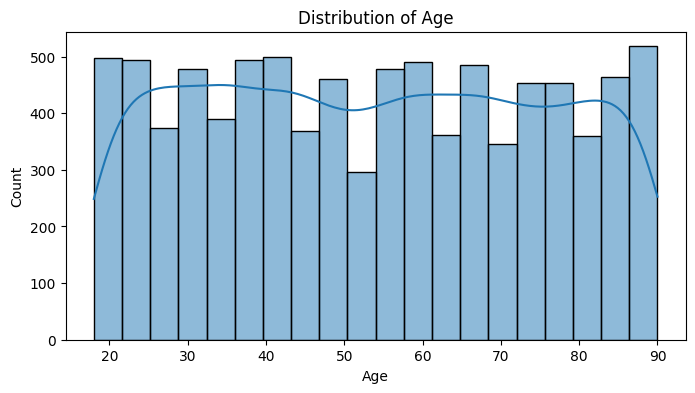

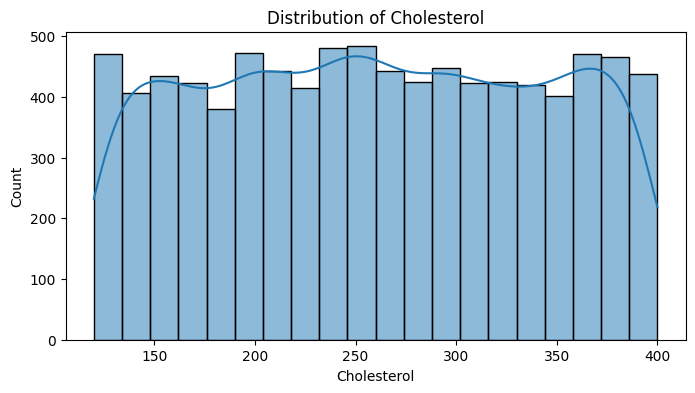

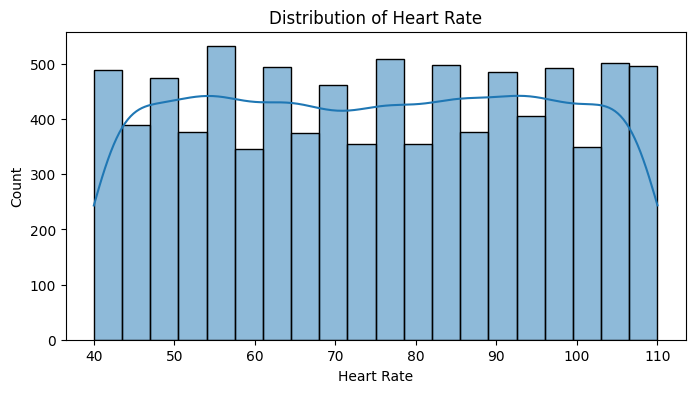

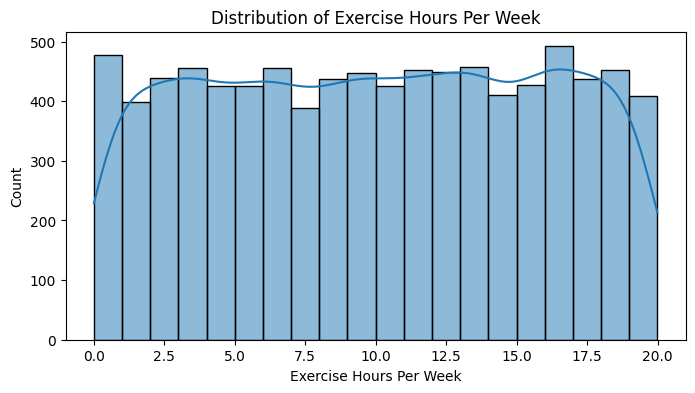

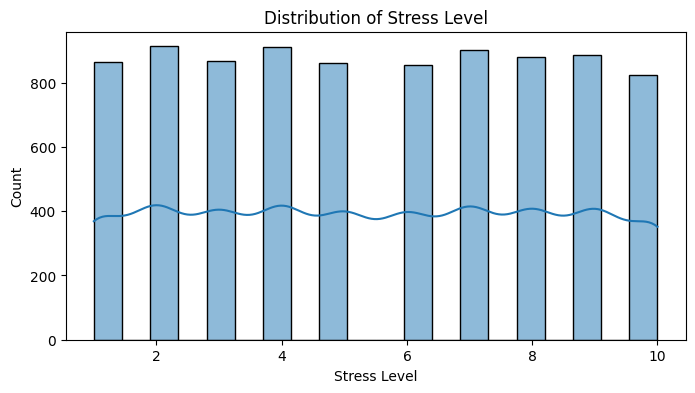

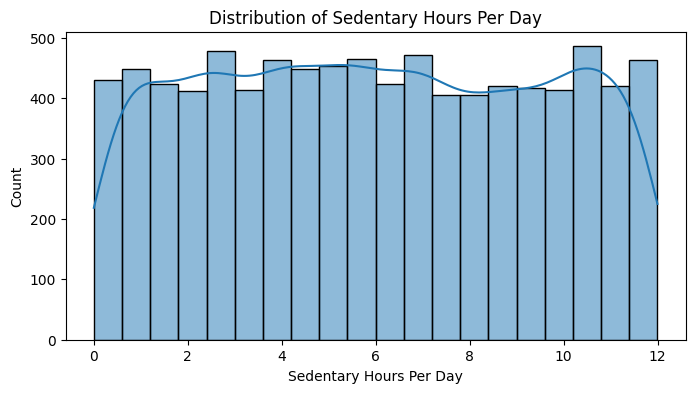

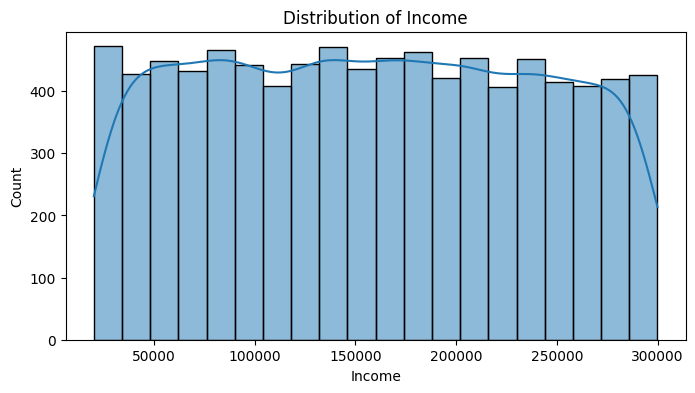

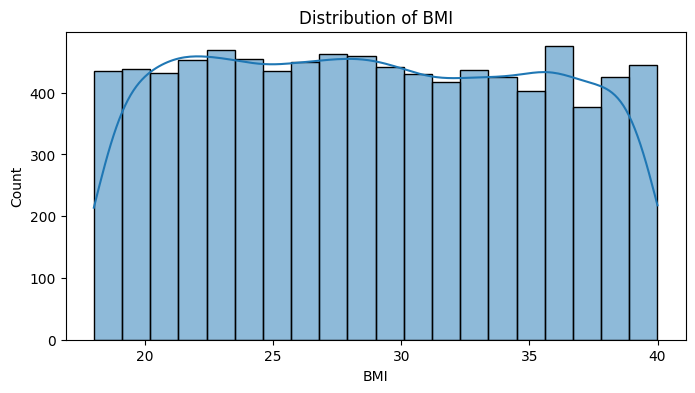

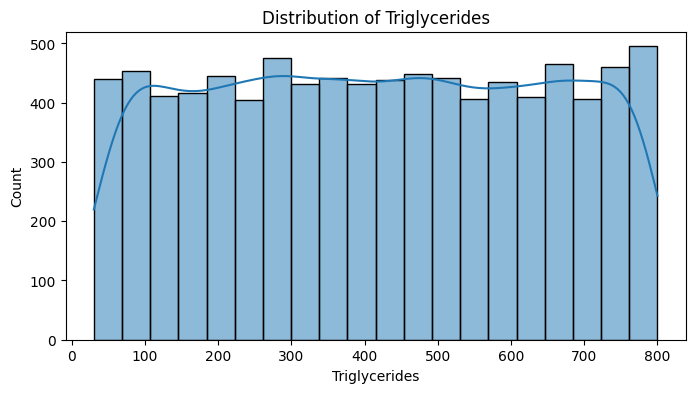

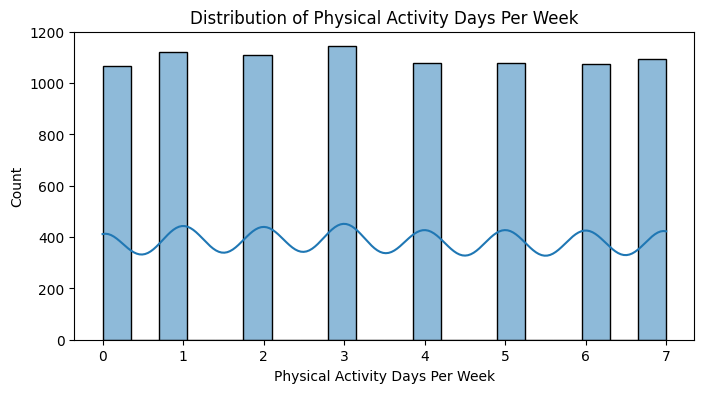

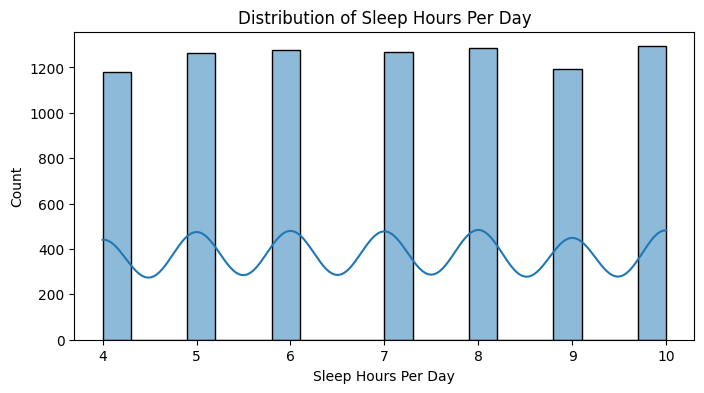

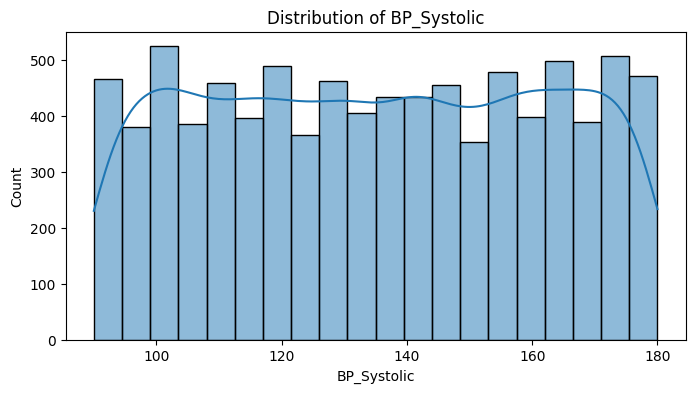

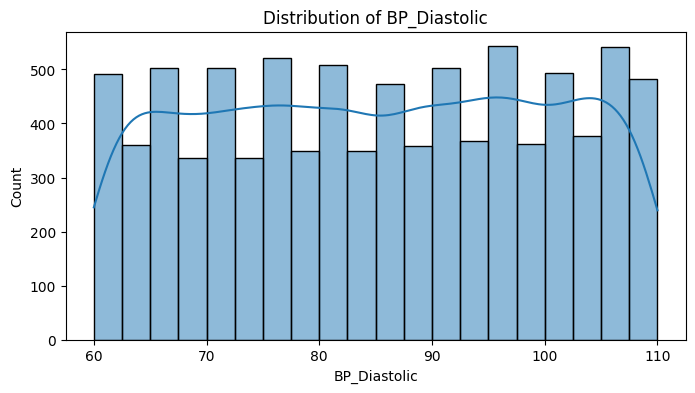

In [ ]:
# Univariate analysis on Numerical Features:

for feature in numerical_ftrs:                                   # for all Numerical Features
    plot.figure(figsize=(8, 4))                                       # Defining Figure Size
    sns.histplot(data=hrt_attackDtst, x=feature, bins=20, kde=True) # histplot() function is used
    plot.title(f'Distribution of {feature}')                          # defining title
    plot.show()                                                       # display

**Categorical Features:**

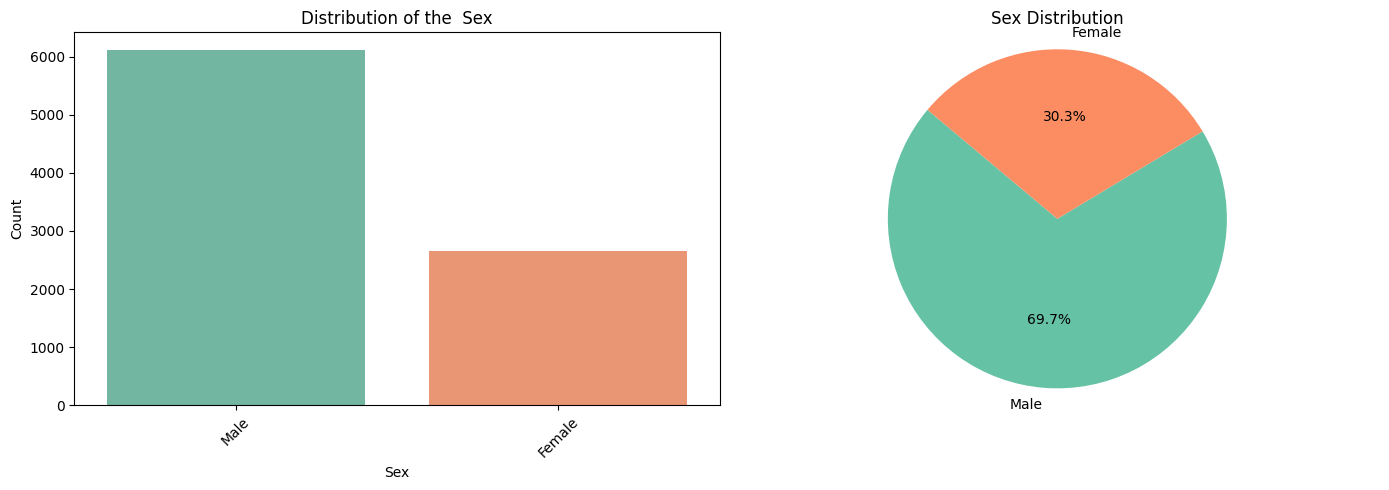

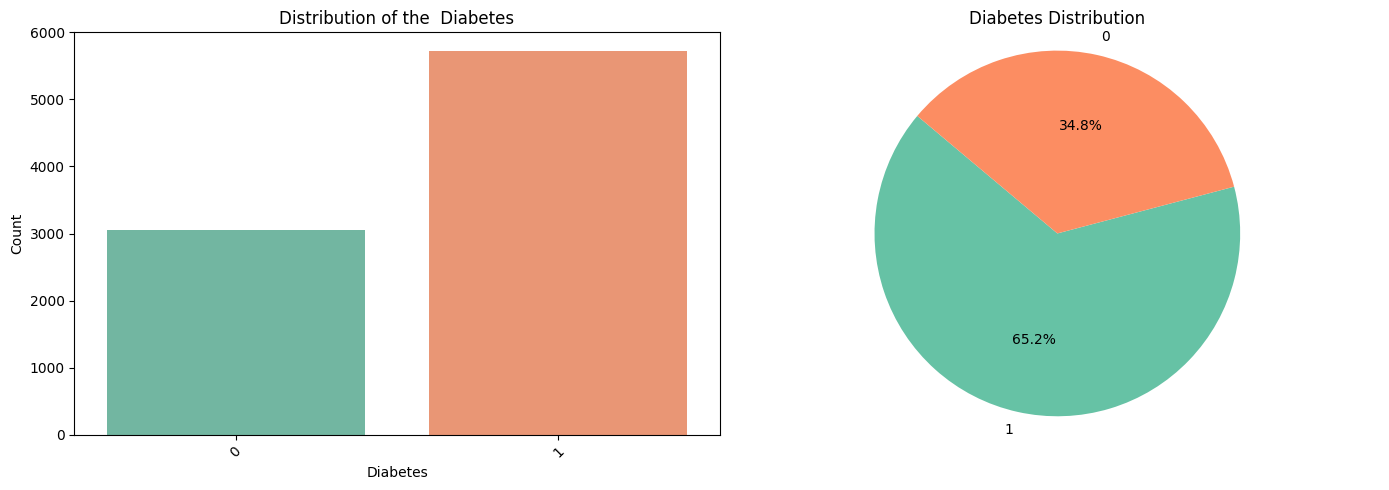

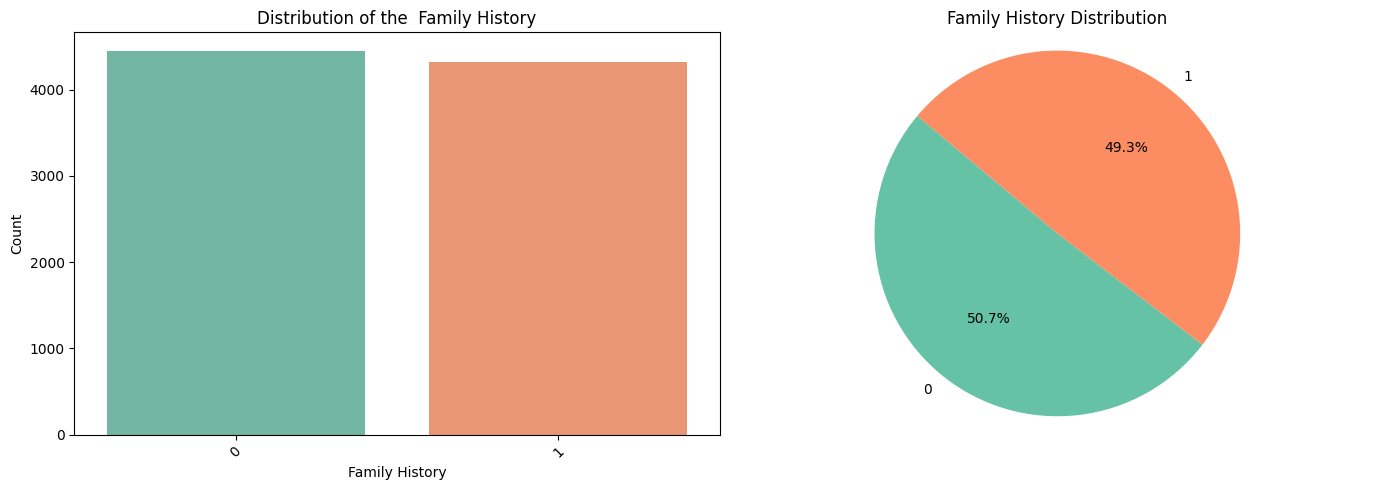

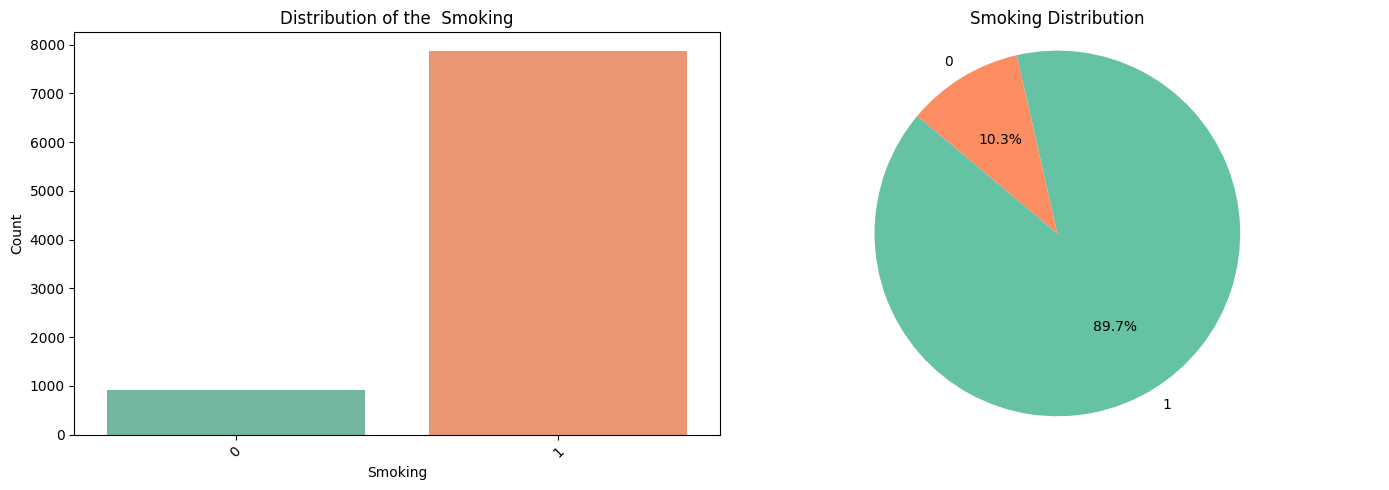

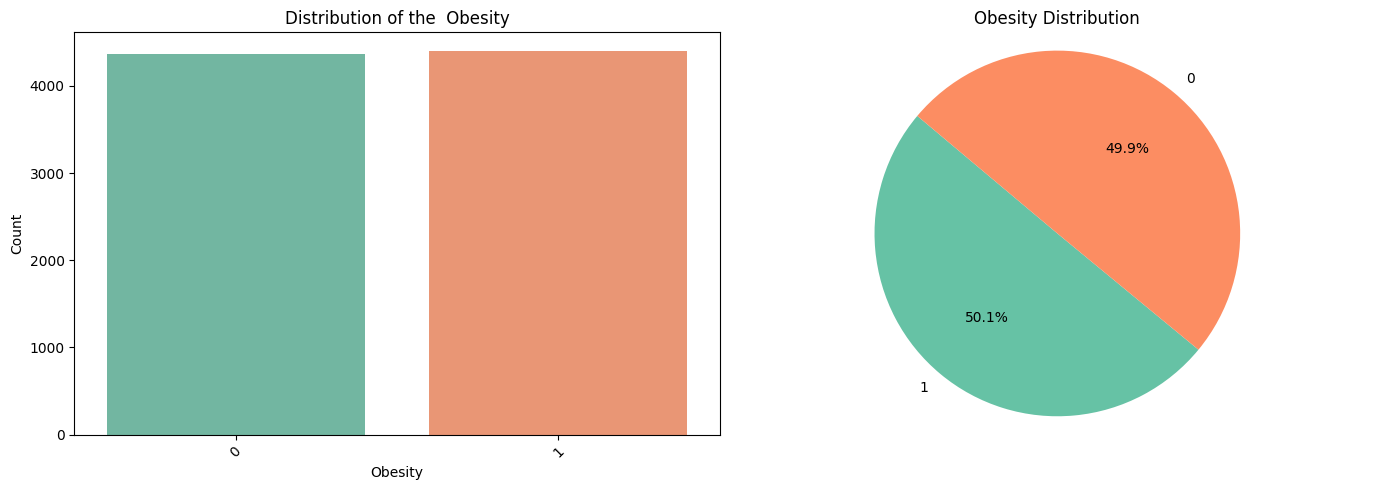

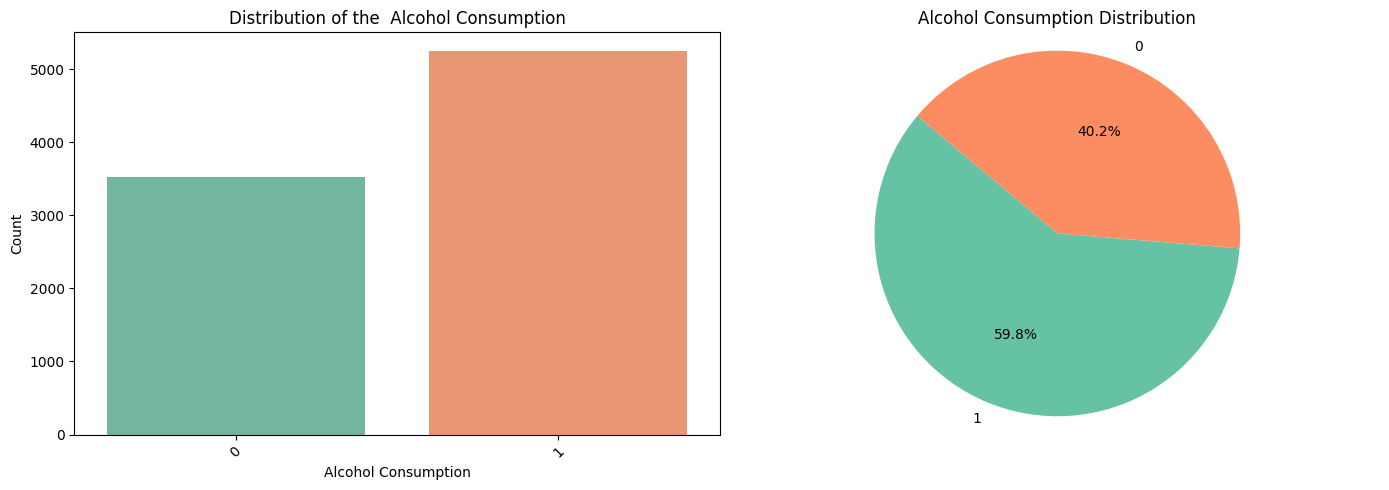

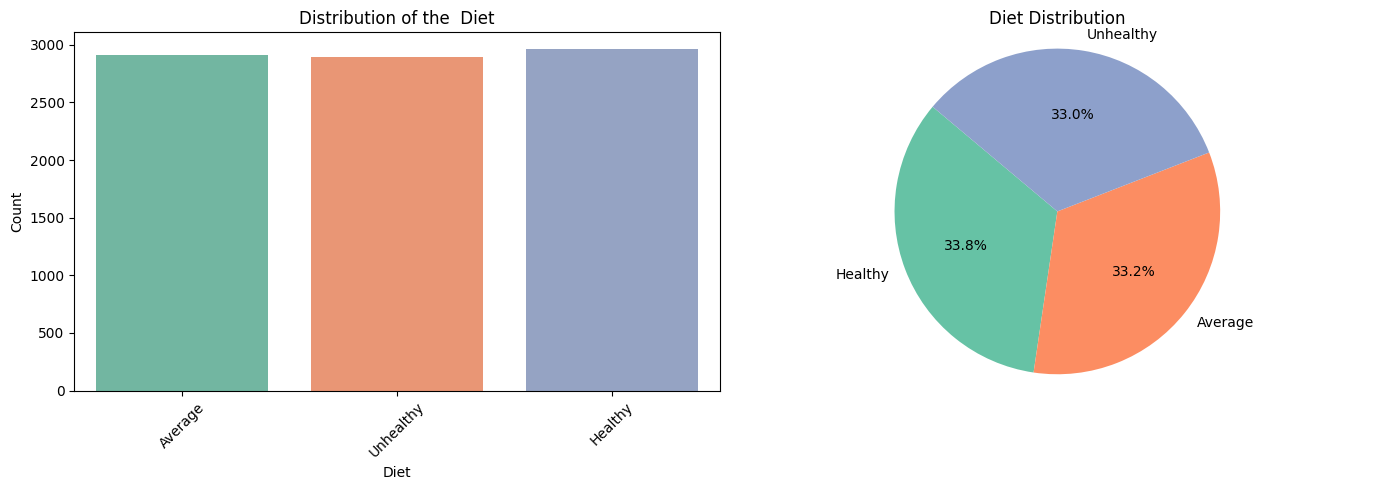

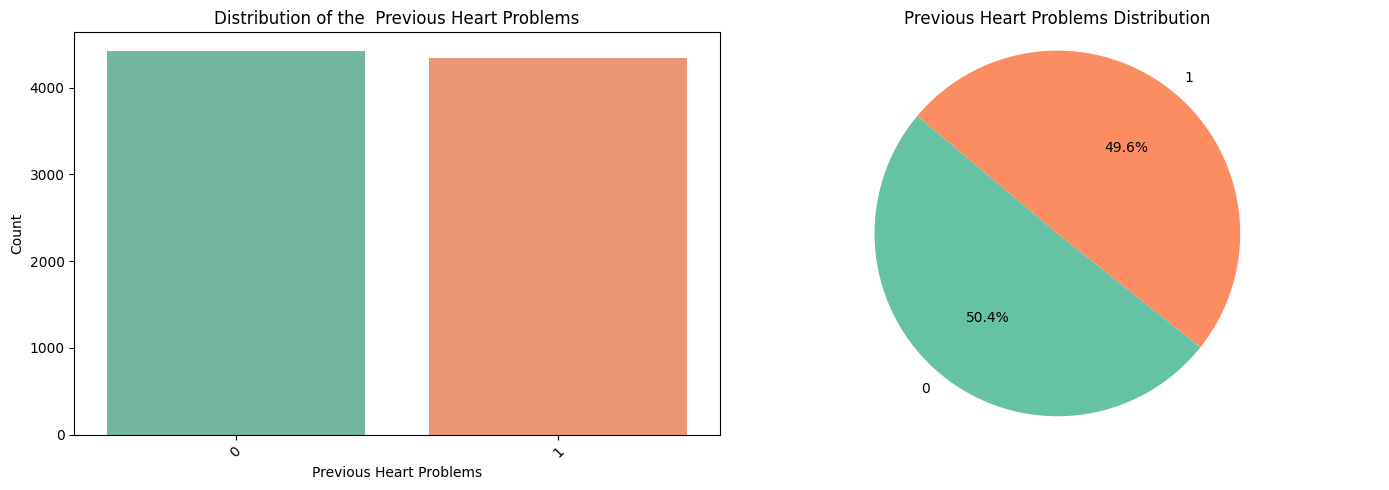

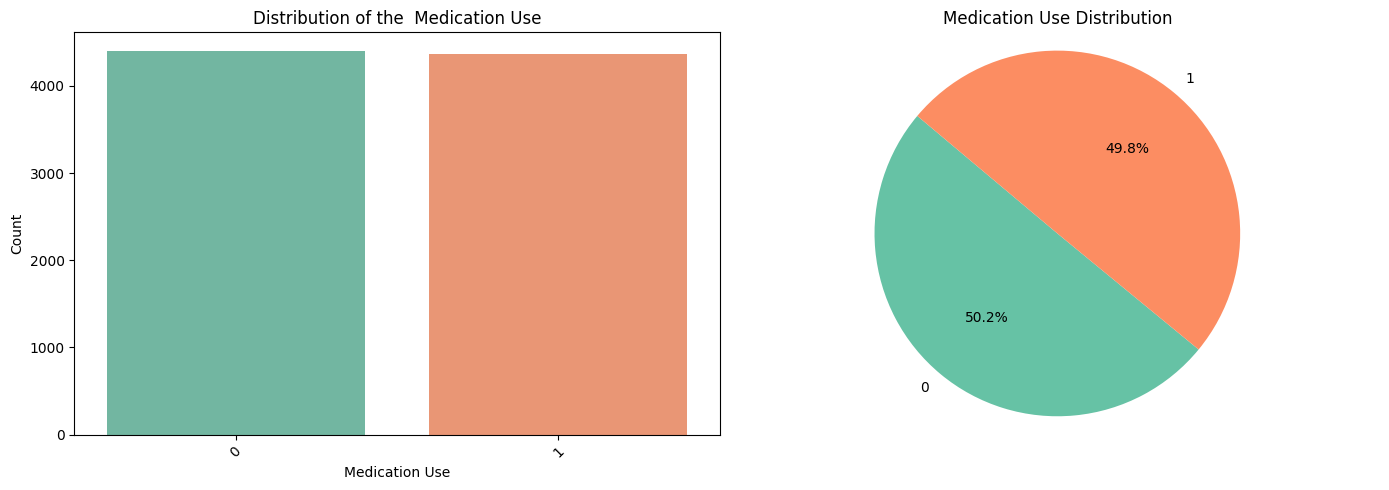

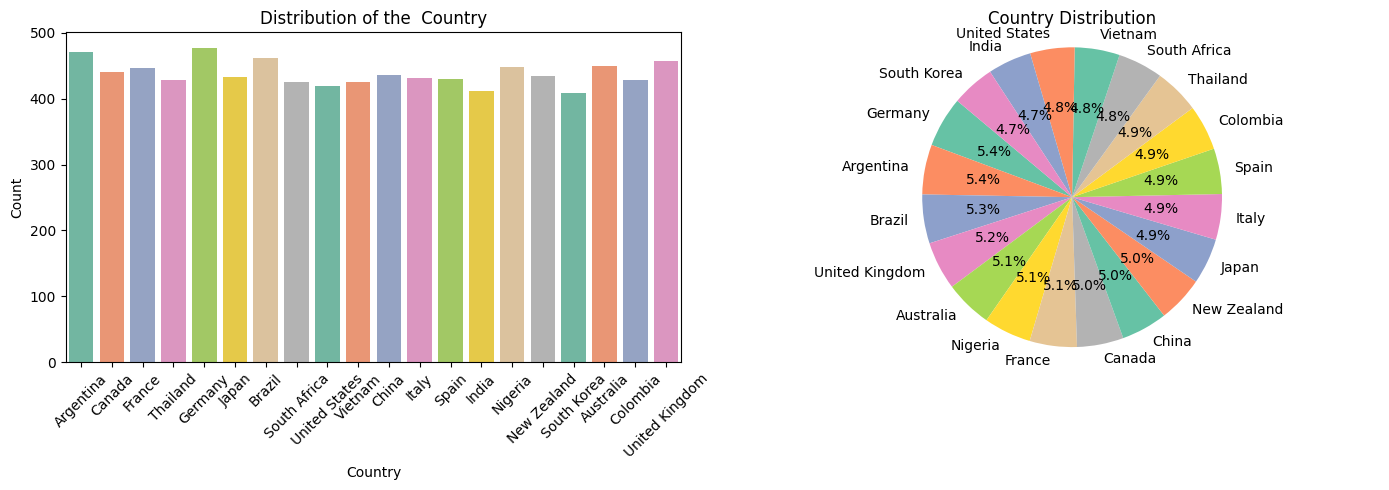

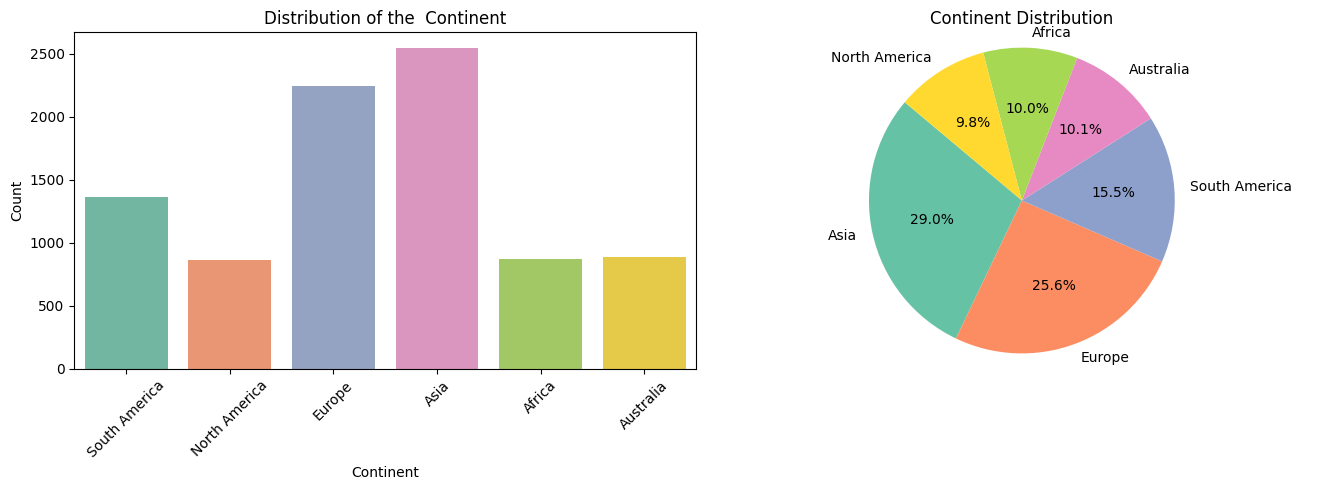

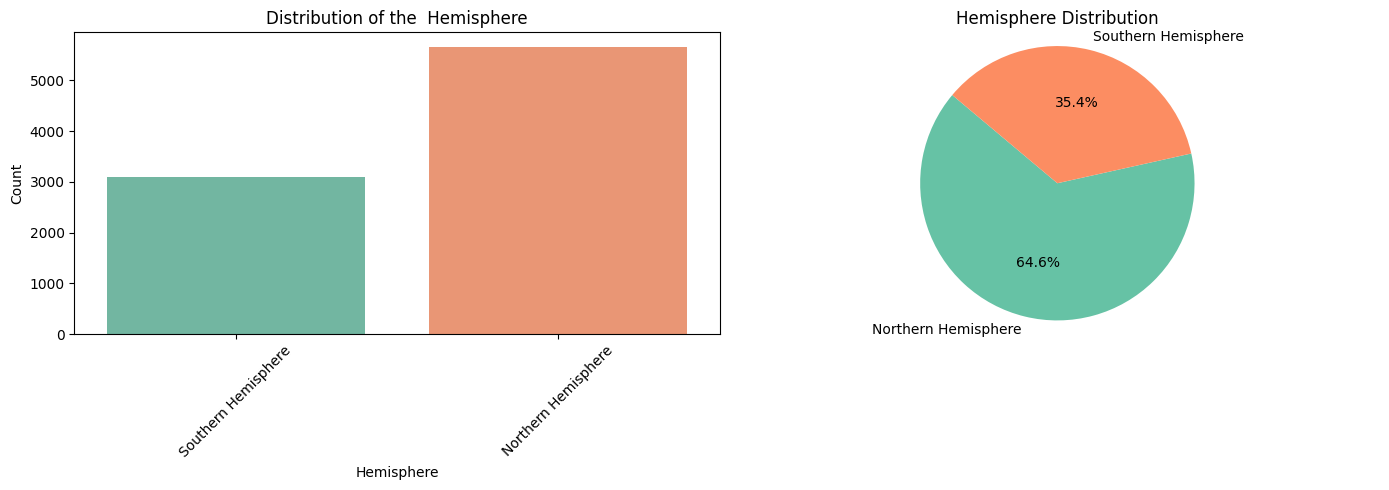

In [ ]:
# defining color palatte
colorPalette = sns.color_palette("Set2")
for feature in categorical_ftrs:
    # Create a figure with subplots for all categorical Features
    fig, (ax1, ax2) = plot.subplots(1, 2, figsize=(14, 5))
    # plotting all bar plots using countplot() function
    sns.countplot(data=hrt_attackDtst, x=feature, palette=colorPalette, ax=ax1)
    # setting title,Xlabel,Ylabel etc,.
    ax1.set_title(f'Distribution of the  {feature}')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Count')
    # craeting a pie chart
    cnts = hrt_attackDtst[feature].value_counts()
    lbl = cnts.index
    size = cnts.values
    # using pie() method to plot pie chart among categorical Features
    ax2.pie(size, labels=lbl, colors=colorPalette, autopct='%1.1f%%', startangle=140)
    ax2.axis('equal')
    # Defining Title.
    ax2.set_title(f'{feature} Distribution')
    plot.tight_layout()
    # Display
    plot.show()

**Correlation Analysis**

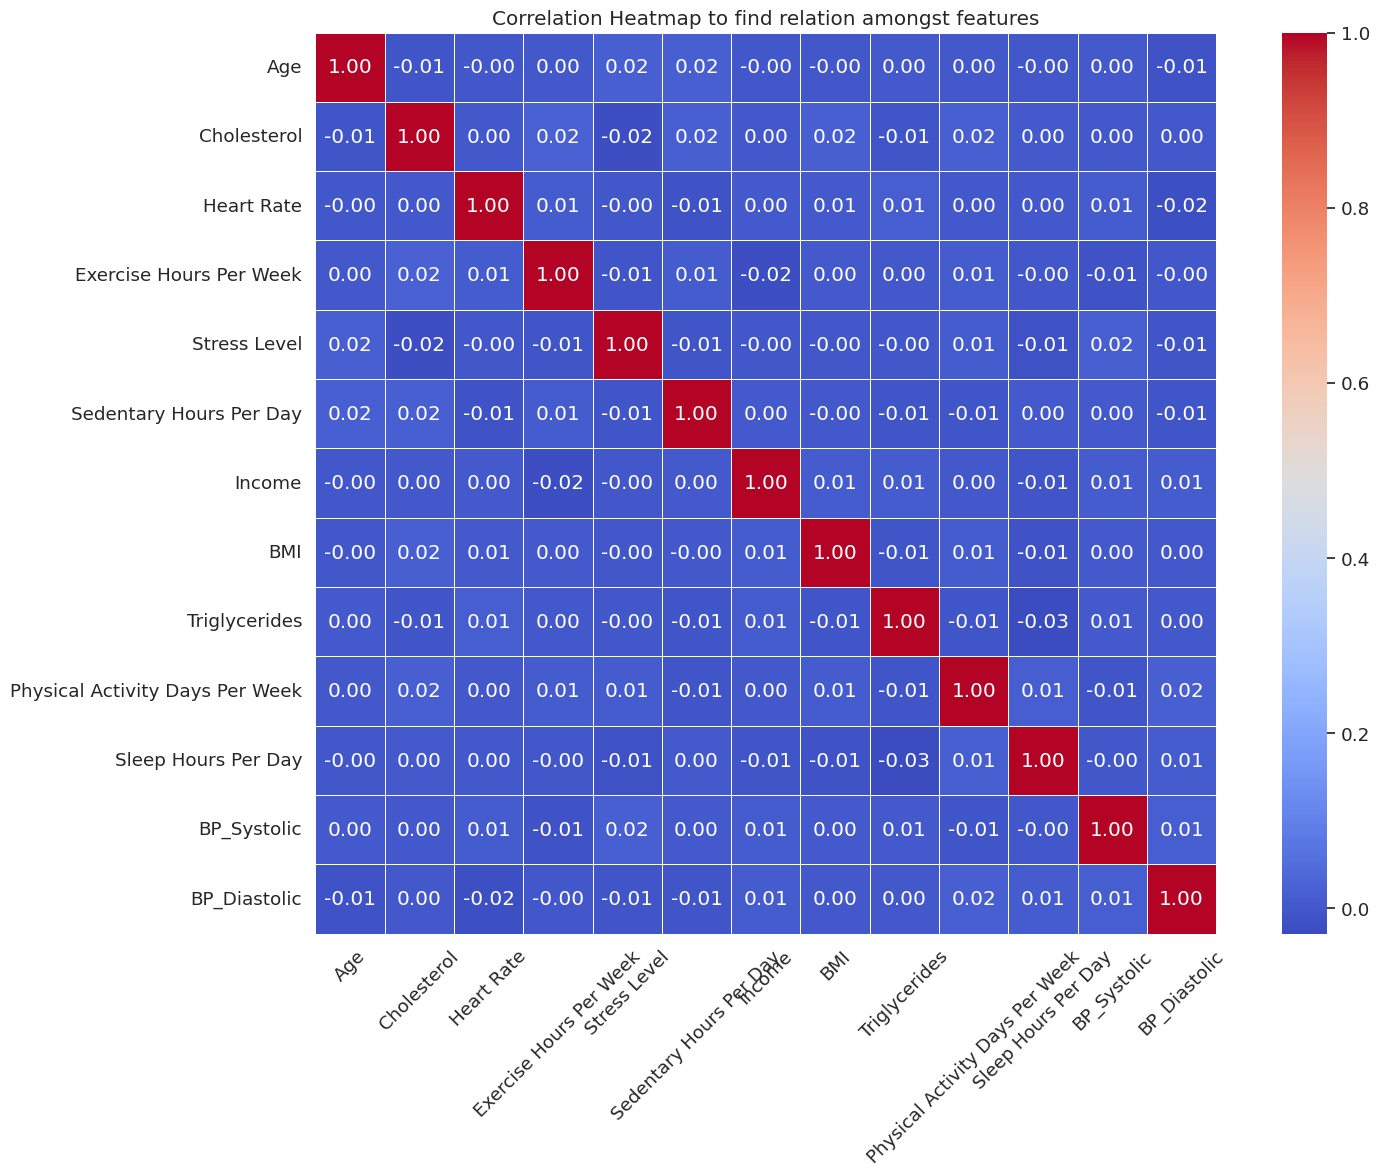

In [ ]:
# Correlation Analysis using corr() Function
corrMatrixRelation = hrt_attackDtst[numerical_ftrs].corr()
# Defining Figure Size
plot.figure(figsize=(16, 12))
sns.set(font_scale=1.2)
# Plotting Heatmap
sns.heatmap(corrMatrixRelation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.4, square=True)
# Defining Title, Xticks
plot.title("Correlation Heatmap to find relation amongst features")
plot.xticks(rotation=45)
plot.tight_layout()
# display
plot.show()

**Data Visualization**

1. Age Distribution

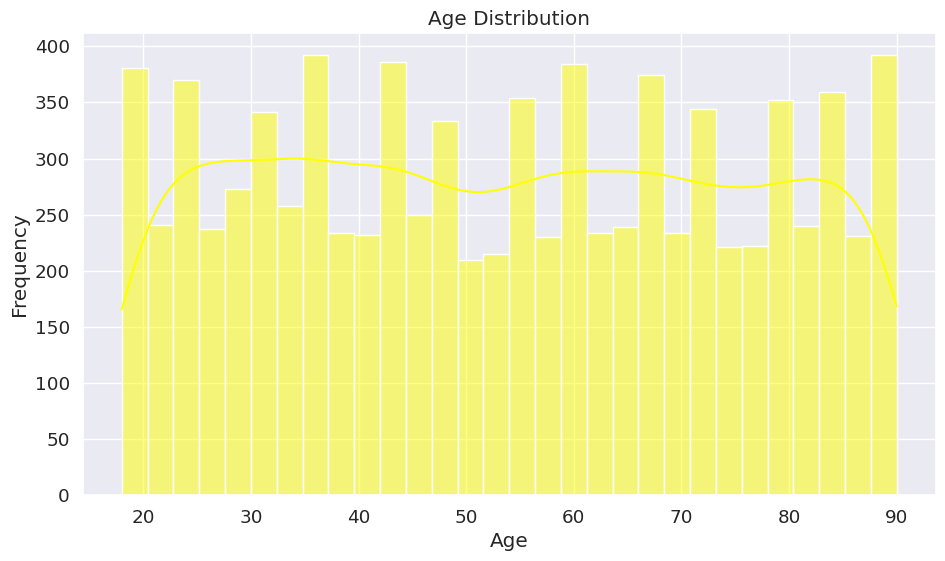

In [ ]:
# Defining Figure Size
plot.figure(figsize=(11, 6))
# Plotting
sns.histplot(data=hrt_attackDtst, x='Age', bins=30, kde=True, color='yellow')
# Defining Title,Xlabel,Ylabel
plot.title('Age Distribution')
plot.xlabel('Age')
plot.ylabel('Frequency')
# display
plot.show()

2. Cholesterol Levels

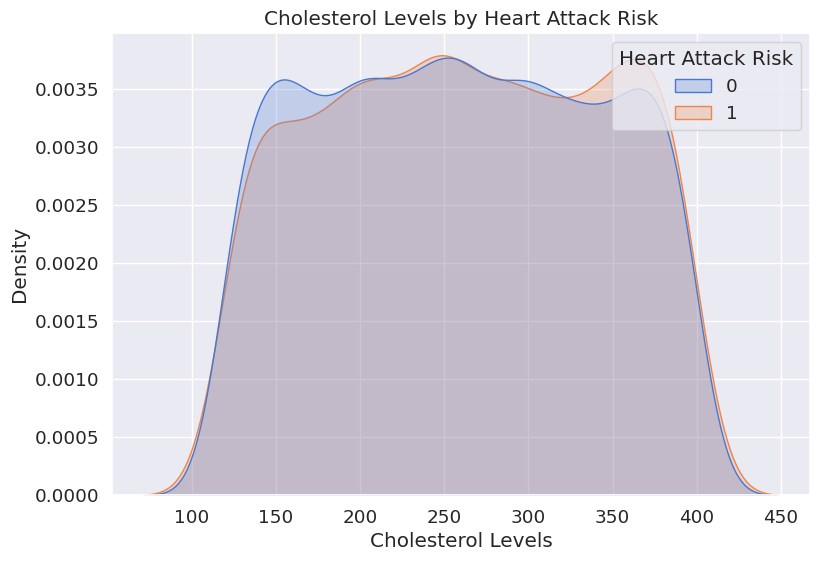

In [ ]:
# Defining a figure size
plot.figure(figsize=(9, 6))
# plotting using a Kernel Density Estimate Plot between heart attack risk and cholestrol
sns.kdeplot(data=hrt_attackDtst, x='Cholesterol', hue='Heart Attack Risk', fill=True, common_norm=False, palette="muted")
# Defining Title Xlabel,Ylabel
plot.title('Cholesterol Levels by Heart Attack Risk')
plot.xlabel('Cholesterol Levels')
plot.ylabel('Density')
# Display
plot.show()


3. Heart rate chance vs. Age

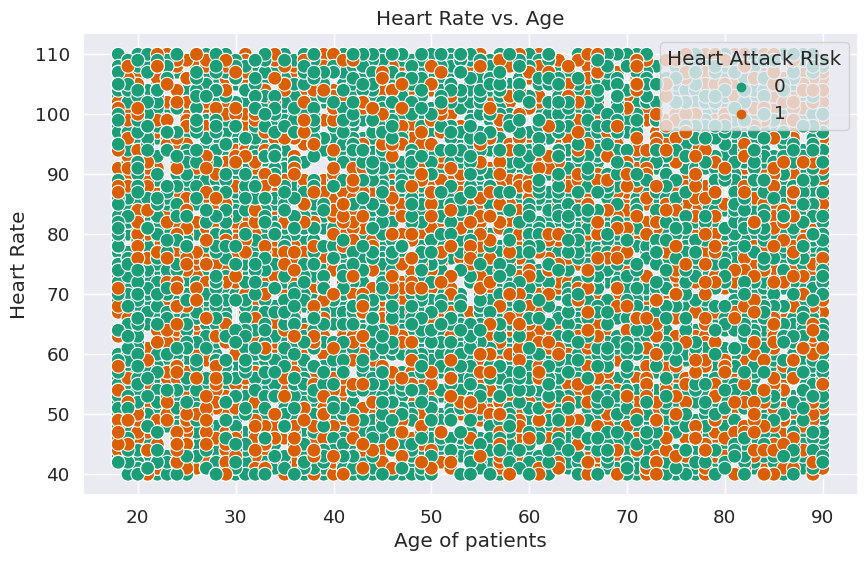

In [ ]:
# defining a figure size
plot.figure(figsize=(10, 6))
# plotting a scatterplot
sns.scatterplot(data=hrt_attackDtst, x='Age', y='Heart Rate', hue='Heart Attack Risk', palette="Dark2", s=100)
# Defining Title,Xlabel,Ylabel
plot.title('Heart Rate vs. Age')
plot.xlabel('Age of patients')
plot.ylabel('Heart Rate')
# Displaying
plot.show()

4. Exercise Hours vs. BMI

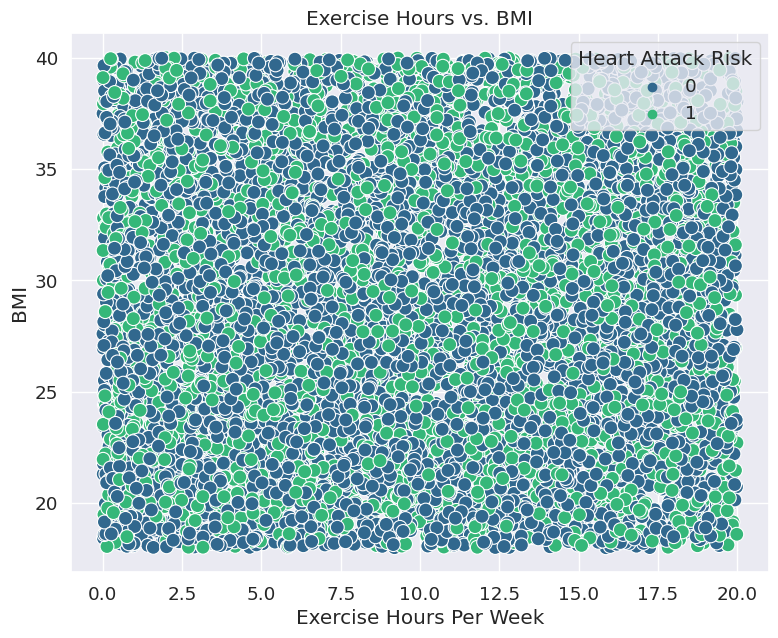

In [ ]:
# Defining a figure and its size
plot.figure(figsize=(9, 7))
# plotting a scatter Plot between Excercise hours vs BMI
sns.scatterplot(data=hrt_attackDtst, x='Exercise Hours Per Week', y='BMI', hue='Heart Attack Risk', palette="viridis", s=100)
# Defining Title, Xlabel,Ylabel
plot.title('Exercise Hours vs. BMI')
plot.xlabel('Exercise Hours Per Week')
plot.ylabel('BMI')
# Display
plot.show()

 5. Blood Pressure Systolic Distribution

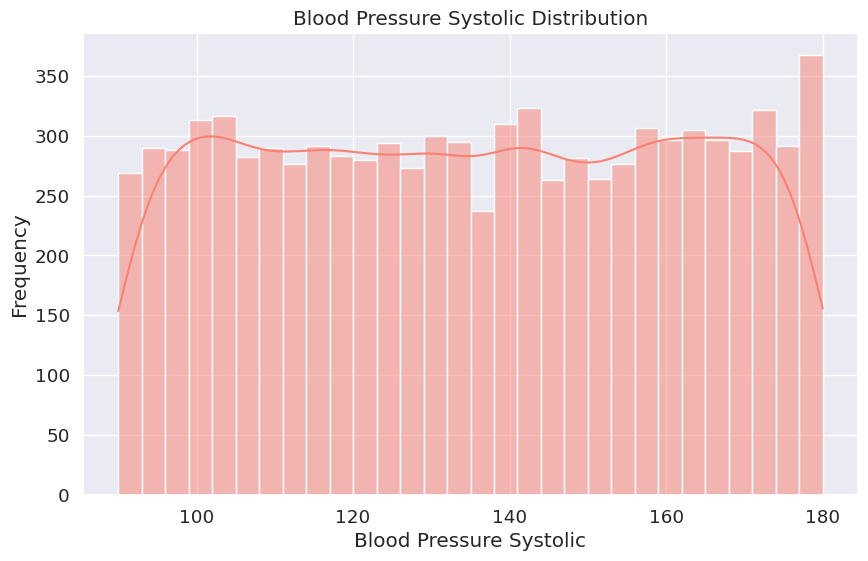

In [ ]:
# plotting figure
plot.figure(figsize=(10, 6))
# histplot method is used to plot the graph
sns.histplot(data=hrt_attackDtst, x='BP_Systolic', bins=30, kde=True, color='salmon')
# title,xlabel,ylabel is provided
plot.title('Blood Pressure Systolic Distribution')
plot.xlabel('Blood Pressure Systolic')
plot.ylabel('Frequency')
plot.show() #display

6. Blood Pressure Diastolic Distribution

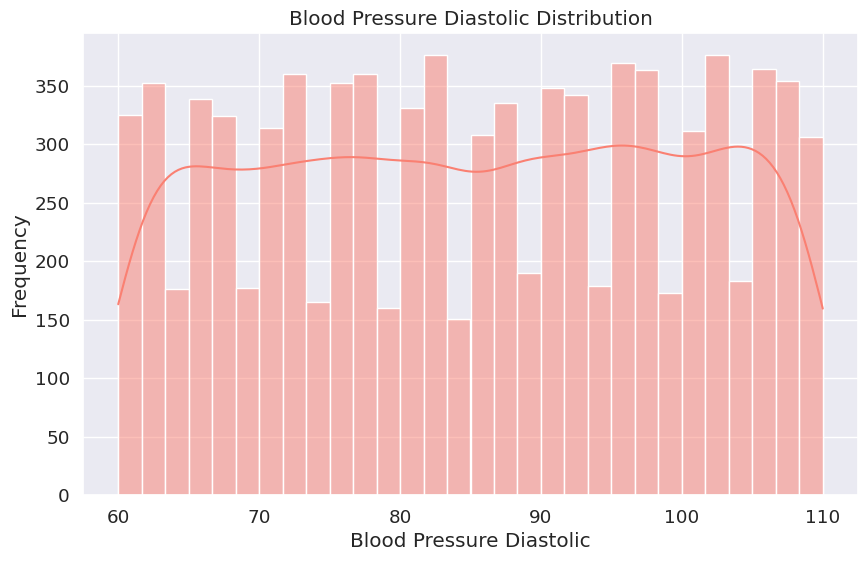

In [ ]:
# Blood Pressure Diastolic Distribution

# figure size is defined
plot.figure(figsize=(10, 6))
# histplot is the function used to plot data
sns.histplot(data=hrt_attackDtst, x='BP_Diastolic', bins=30, kde=True, color='salmon')
# title, xlabel,ylabel is named
plot.title('Blood Pressure Diastolic Distribution')
plot.xlabel('Blood Pressure Diastolic')
plot.ylabel('Frequency')
plot.show()  # display

7. Stress Level vs. Exercise Hours

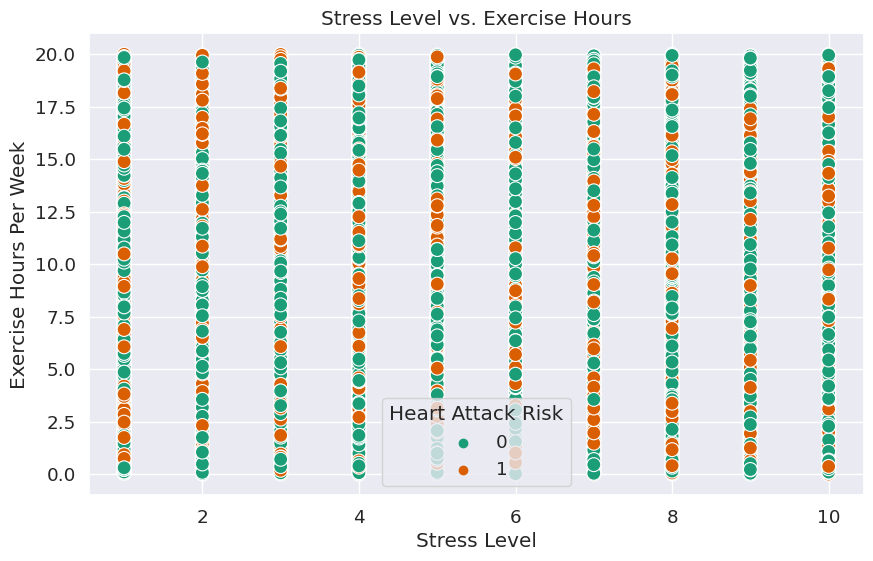

In [ ]:
# Stress Level vs. Exercise Hours
# figure size defined
plot.figure(figsize=(10, 6))
# scatter plot is plotted
sns.scatterplot(data=hrt_attackDtst, x='Stress Level', y='Exercise Hours Per Week', hue='Heart Attack Risk', palette="Dark2", s=100)
# labels and title are named
plot.title('Stress Level vs. Exercise Hours')
plot.xlabel('Stress Level')
plot.ylabel('Exercise Hours Per Week')
plot.show() # display

8. Gender Distribution

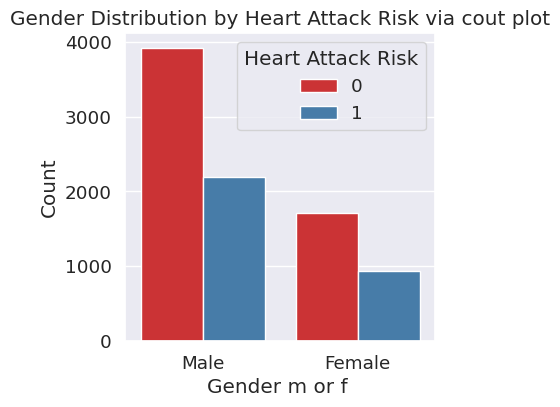

In [ ]:
# Plotting digure
plot.figure(figsize=(4, 4))
# countplot function is used
sns.countplot(data=hrt_attackDtst, x='Sex', hue='Heart Attack Risk', palette="Set1")
# title , labels are named
plot.title('Gender Distribution by Heart Attack Risk via cout plot')
plot.xlabel('Gender m or f ')
plot.ylabel('Count')
plot.show() # display

9. Cholesterol Levels vs. Exercise Hours Per Week

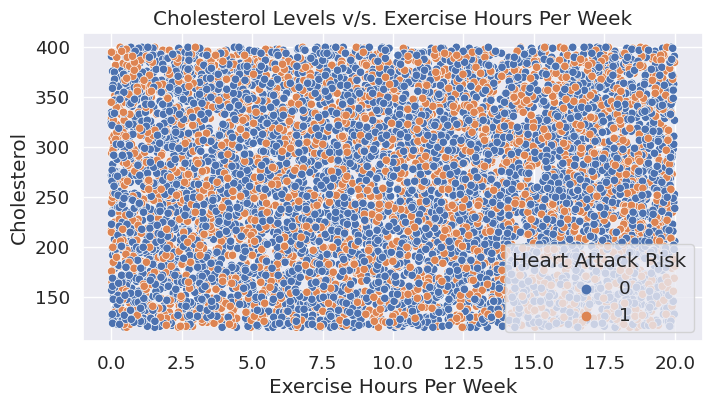

In [ ]:
# fig size has defined
plot.figure(figsize=(8, 4))
# scatter plot is plotted
sns.scatterplot(data=hrt_attackDtst, x='Exercise Hours Per Week', y='Cholesterol', hue='Heart Attack Risk')
# title is provided
plot.title('Cholesterol Levels v/s. Exercise Hours Per Week')
plot.show()  # display

**Adressing Outliers:**

In [ ]:
# Addressing Outliers (Age) at quartile 1 and 3
qrtl1 = hrt_attackDtst['Age'].quantile(0.25)
qrtl3 = hrt_attackDtst['Age'].quantile(0.75)
iqr = qrtl3 - qrtl1
# lower ound and upper bound
lowerBound4qrtl = qrtl1 - 1.5 * iqr
upperBound4qrtl = qrtl3 + 1.5 * iqr
# the values aof lower and upper bound are:
print("Upper Bound of Age: ")
print(upperBound4qrtl)
print("Lower Bound of Age: ")
print(lowerBound4qrtl)

Upper Bound of Age: 
127.5
Lower Bound of Age: 
-20.5


In [ ]:
#Addressing Outliers (Exercise Hours Per Week)
quartileFrst = hrt_attackDtst['Exercise Hours Per Week'].quantile(0.25)
quartileThr = hrt_attackDtst['Exercise Hours Per Week'].quantile(0.75)
iqr = quartileFrst - quartileThr
lower_bound = quartileFrst - 1.5 * iqr
upper_bound = quartileThr + 1.5 * iqr
print("Upper Bound of Exercise Hours Per Week is given by: ")
print(upper_bound)
print("Lower Bound of Exercise Hours Per Week is given by: ")
print(lower_bound)

Upper Bound of Exercise Hours Per Week is given by: 
-0.0526410052663131
Lower Bound of Exercise Hours Per Week is given by: 
20.084237465347364


**Standardization or Normalization**

In [ ]:
# normalizing the data
scaler = StandardScaler()
# normalizing numerical attributes
hrt_attackDtst[numerical_ftrs] = scaler.fit_transform(hrt_attackDtst[numerical_ftrs])
# normalizing Categorical Features
hrt_attackDtst = pan.get_dummies(hrt_attackDtst, columns=categorical_ftrs)
# head
hrt_attackDtst.head(7)

Patient ID       Age  Cholesterol  Heart Rate  Exercise Hours Per Week  \
0    BMW7812  0.625557    -0.641579   -0.147042                -1.010838   
1    CZE1114 -1.539322     1.596895    1.118179                -1.418027   
2    BNI9906 -1.539322     0.793023   -0.147042                -1.372188   
3    JLN3497  1.425621     1.522691   -0.098380                -0.032188   
4    GFO8847  0.578495     0.718820    0.874867                -0.727941   
5    ZOO7941  0.013743     0.459107   -1.314938                -1.623483   
6    WYV0966  1.707997     1.213510    0.436906                -1.022943   

   Stress Level  Sedentary Hours Per Day    Income       BMI  Triglycerides  \
0      1.234604                 0.179251  1.280130  0.373454      -0.588539   
1     -1.563129                -0.297225  1.582523 -0.268479      -0.816487   
2      1.234604                 1.001031  0.955917 -0.113134       0.756800   
3      1.234604                 0.477557 -0.404902  1.198524      -0.177339   
4      0.185454                -1.292170  0.028445 -1.120826      -0.834365   
5     -1.213412                 0.520767  1.031094 -1.383898       1.686470   
6      0.535170                -1.548207  0.399486 -0.000892      -0.597478   

   ...  Country_United States  Country_Vietnam  Continent_Africa  \
0  ...                      0                0                 0   
1  ...                      0                0                 0   
2  ...                      0                0                 0   
3  ...                      0                0                 0   
4  ...                      0                0                 0   
5  ...                      0                0                 0   
6  ...                      0                0                 0   

   Continent_Asia  Continent_Australia  Continent_Europe  \
0               0                    0                 0   
1               0                    0                 0   
2               0                    0                 1   
3               0                    0                 0   
4               1                    0                 0   
5               0                    0                 1   
6               0                    0                 0   

   Continent_North America  Continent_South America  \
0                        0                        1   
1                        1                        0   
2                        0                        0   
3                        1                        0   
4                        0                        0   
5                        0                        0   
6                        1                        0   

   Hemisphere_Northern Hemisphere  Hemisphere_Southern Hemisphere  
0                               0                               1  
1                               1                               0  
2                               1                               0  
3                               1                               0  
4                               1                               0  
5                               1                               0  
6                               1                               0  

[7 rows x 62 columns]

**Initializing train and test variables**

In [ ]:
#%%
Xpred = hrt_attackDtst.drop(['Heart Attack Risk', 'Patient ID'], axis=1)
ytheta = hrt_attackDtst['Heart Attack Risk']

X_trainvl, X_testvl, y_trainvl, y_testvl = train_test_split(Xpred, ytheta, test_size=0.2, random_state=42)

**Step 3: Feature Selection**

In [ ]:
# deploying random forest classifier
rfclsfr = RandomForestClassifier(n_estimators=100, random_state=0)
rfclsfr.fit(Xpred, ytheta)  # feeding x,y inputs

RandomForestClassifier(random_state=0)

In [ ]:
 #Retrieve feature importances from the model
feature_importances = rfclsfr.feature_importances_

In [ ]:
# Create a DataFrame to display feature names and their importance scores
feature_importance_datafr = pan.DataFrame({'Feature': Xpred.columns, 'Importance': feature_importances})

In [ ]:
# Create a DataFrame to display feature names and their importance scores
feature_importance_datafr = pan.DataFrame({'Feature': Xpred.columns, 'Importance': feature_importances})

# Sorting the features by importance in descending order
feature_importance_datafr = feature_importance_datafr.sort_values(by='Importance', ascending=False)
feature_importance_datafr.head(5)  # printing head values as n=5

Feature  Importance
7                      BMI    0.065557
6                   Income    0.064941
5  Sedentary Hours Per Day    0.064535
3  Exercise Hours Per Week    0.064519
8            Triglycerides    0.063902

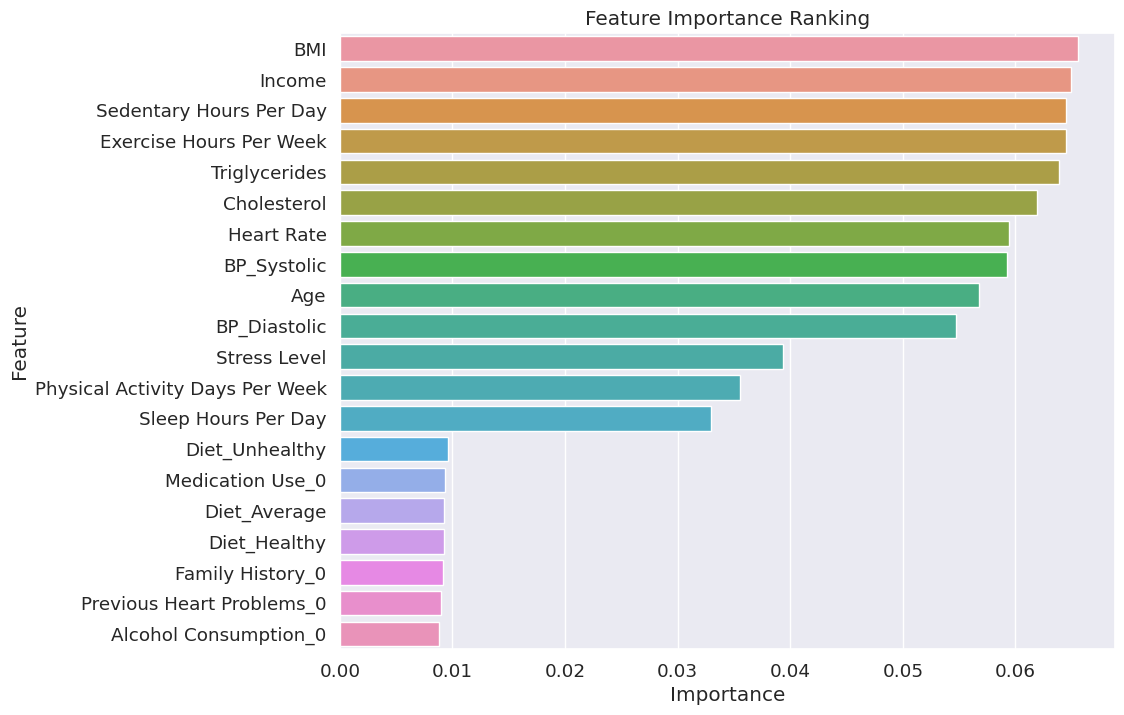

In [ ]:
# Visualizing feature importance
plot.figure(figsize=(10, 8))
# plotting graph
sns.barplot(x='Importance', y='Feature', data=feature_importance_datafr[:20])
# title and labels are given
plot.title("Feature Importance Ranking")
plot.xlabel("Importance")
plot.ylabel("Feature")
plot.show()   # display

**Model Selection and Model Training**

In [ ]:
# Model Selection and Model Training

X_trainvl, X_testvl, y_trainvl, y_testvl = train_test_split(Xpred, ytheta, test_size=0.2, random_state=42)

In [ ]:
# choose x value which is given to linear regression
ftr4linereg = 'BMI'  # Replace 'feature_name' with the actual name of the feature

# Extract the chosen feature from X_test
x_axis_data = X_testvl[ftr4linereg].values.reshape(-1, 1)

# linear reg is depoyed
model = LinearRegression()

# Train data is feeded to algorithm
model.fit(X_trainvl, y_trainvl)

# predict outputs
y_HAT = model.predict(X_testvl)

# performance of algorithm
meansqerr = mean_squared_error(y_testvl, y_HAT)   # mean square error measure
r2METRIC = r2_score(y_testvl, y_HAT)   # r-square metric

# printing linear regression parameters such as coefficients and y intercept , performance metrics
print("Intercept:", model.intercept_)
print("Mean Squared Error:", meansqerr)
print(" Coefficients:", model.coef_)
print("R-squared:", r2METRIC)



Intercept: 1143688486226.548
Mean Squared Error: 0.23182067694965935
 Coefficients: [ 7.56608645e-03  9.68439709e-03 -2.47181479e-03  7.48091323e-03
 -6.54555518e-03 -2.56304965e-03  6.26606656e-03  4.72932488e-03
  6.08686939e-03 -1.77895144e-03 -8.11427731e-03  8.32516468e-03
 -1.91419442e-03  3.74180382e+11  3.74180382e+11 -7.24097648e+11
 -7.24097648e+11 -2.96042122e+11 -2.96042122e+11 -1.18279972e+12
 -1.18279972e+12  3.44358806e+11  3.44358806e+11 -3.79404448e+11
 -3.79404448e+11  5.28735242e+11  5.28735242e+11  5.28735242e+11
  2.79929873e+11  2.79929873e+11  1.03867485e+11  1.03867485e+11
  8.49136961e+10 -7.02188519e+10  8.49136961e+10  8.15888865e+10
 -6.59514471e+10  9.06376814e+10  7.71804425e+10  7.71804425e+10
 -6.59514471e+10  7.14564572e+10 -6.59514471e+10 -7.02188519e+10
  3.23083562e+11  3.17359577e+11 -6.59514471e+10  7.14564572e+10
 -6.59514471e+10  7.71804425e+10  8.15888865e+10 -6.59514471e+10
 -2.62428492e+11  1.26606517e+11  1.25149936e+11 -1.65253727e+10
 -2.09

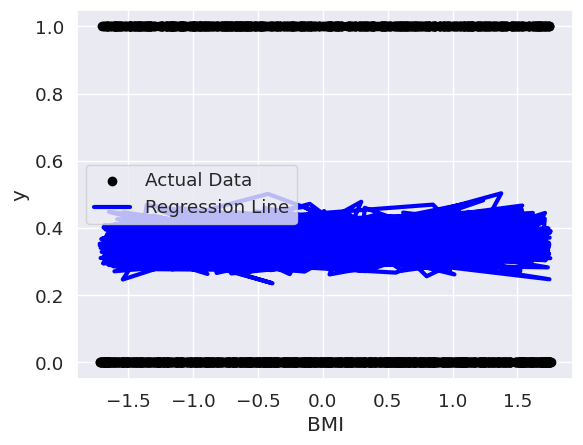

In [ ]:
# Plot the data and regression line
plot.scatter(x_axis_data, y_testvl, color='black', label='Actual Data')
plot.plot(x_axis_data, y_HAT, color='blue', linewidth=3, label='Regression Line')
plot.xlabel(ftr4linereg)
plot.ylabel('y')
plot.legend()
plot.show()

After linear regression is rejected we are trying to select a model for classification

# Second Draft - (part -2)

# Model Selection and Model Training

In [ ]:
# splitting data set

X_trainvl, X_testvl, y_trainvl, y_testvl = train_test_split(Xpred, ytheta, test_size=0.2, random_state=42)
# all the models available
models = {
    'Logistic Regression': LogisticRegression(),
    'neural network':MLPClassifier(),
    'support vector machine':SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest classifier': RandomForestClassifier(),

}

In [ ]:
# fitting x train and y train values
for model_name, model in models.items():
    model.fit(X_trainvl, y_trainvl)
    y_theta = model.predict(X_testvl)
# caliculating performance metrics for the testing of y label and y_theta values
    accuracy = accuracy_score(y_testvl, y_theta)
    precision = precision_score(y_testvl, y_theta)
    recall = recall_score(y_testvl, y_theta)
    f1 = f1_score(y_testvl, y_theta)
# printing all those metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")


Model: Logistic Regression
Accuracy: 0.64
Precision: 1.00
Recall: 0.00
F1 Score: 0.01




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: neural network
Accuracy: 0.57
Precision: 0.36
Recall: 0.27
F1 Score: 0.31




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: support vector machine
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


Model: Decision Tree
Accuracy: 0.53
Precision: 0.36
Recall: 0.40
F1 Score: 0.38


Model: Random Forest classifier
Accuracy: 0.63
Precision: 0.31
Recall: 0.02
F1 Score: 0.03




In [ ]:
model = RandomForestClassifier()  # defining model
model.fit(X_trainvl, y_trainvl)   # fitting the model


def predict_hrtdis():   # prediction function]


    age = float(input("Enter age: "))
    sex = float(input("Enter sex (1 for male, 0 for female): "))
    Diabaties = float(input("Enter diabaties (1: yes 0:No): "))
    smoking = input("Enter smoking(1:yes,0:no): ")

    reqdata = [{'age': [age],
                  'sex': [sex],
                  'cp': [Diabaties],
                  'thal': [smoking]
                  }]

    predDF = pan.DataFrame(reqdata)

    #miss columns is given value 0
    defaults = [0] * 60
    userdataf = predDF.reindex(columns=X_trainvl.columns, fill_value=0)

    # future prediction
    prediction = model.predict(userdataf)

    if prediction[0] == 1:
        print("High Risk")
    else:
        print("Low Risk")



# calling a function
predict_hrtdis()

Enter age: 62
Enter sex (1 for male, 0 for female): 1
Enter diabaties (1: yes 0:No): 0
Enter smoking(1:yes,0:no): 0
Low Risk


# Model Hyperparameter tuning

In [ ]:
# dividing categorical and numerical features
categoricalftrs = Xpred.select_dtypes(include=['object']).columns.tolist()
numericalftrs = X_testvl.select_dtypes(include=['number']).columns.tolist()
# standardizing and one hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericalftrs),
        ('cat', OneHotEncoder(), categoricalftrs)
    ])

In [ ]:
# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [ ]:
#  parameter grid for hyperparameter tuning is defined
param_grid = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# gridsearch cv is deployed
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(Xpred, ytheta)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters found by GridSearchCV:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}


# Step 6: Model Evaluation

In [ ]:
#  performance metrics
print(model)
ypred = model.predict(Xpred)
acc = accuracy_score(ytheta, ypred)
precisionval = precision_score(ytheta, ypred)
recallval = recall_score(ytheta, ypred)
f1scr = f1_score(ytheta, ypred)
classification_rep = classification_report(ytheta, ypred)
# printing
print(f"Accuracy: {acc}")
print(f"Precision: {precisionval}")
print(f"Recall: {recallval}")
print(f"F1 Score: {f1scr}")
print("Classification Report:\n", classification_rep)

RandomForestClassifier()
Accuracy: 0.9266233025219673
Precision: 0.991725768321513
Recall: 0.8018477222045237
F1 Score: 0.8867359520873701
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      5624
           1       0.99      0.80      0.89      3139

    accuracy                           0.93      8763
   macro avg       0.95      0.90      0.92      8763
weighted avg       0.93      0.93      0.92      8763



In [ ]:
import warnings
warnings.simplefilter("ignore")

# model Validation:

In [ ]:
# k fold cross validation with splits of 10 folds
kfoldXvl = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model, Xpred, ytheta, cv=kfoldXvl, scoring="accuracy")
# printing each fold
print("Cross-Validation Results:")
for i, acc in enumerate(cross_val_results):
    print(f"Fold {i+1}: {acc}")

Cross-Validation Results:
Fold 1: 0.6305587229190421
Fold 2: 0.6442417331812998
Fold 3: 0.6408209806157354
Fold 4: 0.617579908675799
Fold 5: 0.6221461187214612
Fold 6: 0.617579908675799
Fold 7: 0.66324200913242
Fold 8: 0.6278538812785388
Fold 9: 0.6312785388127854
Fold 10: 0.6449771689497716
